In [2]:
# Import networkx
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sotu_retweets = pd.read_csv('sotu2018-rt.csv')
# Create retweet network from edgelist
G_rt = nx.from_pandas_edgelist(
    sotu_retweets,
    source = 'user-screen_name', 
    target = 'retweeted_status-user-screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in RT network:', len(G_rt.nodes()))

# Print the number of edges
print('Edges in RT network:', len(G_rt.edges()))

Nodes in RT network: 2287
Edges in RT network: 2340


In [3]:
# Import networkx
import networkx as nx
sotu_replies = pd.read_csv('sotu2018-reply.csv')
# Create reply network from edgelist
G_reply = nx.from_pandas_edgelist(
    sotu_replies,
    source = 'user-screen_name', 
    target = 'in_reply_to_screen_name',
    create_using = nx.DiGraph())
    
# Print the number of nodes
print('Nodes in reply network:', len(G_reply.nodes()))

# Print the number of edges
print('Edges in reply network:', len(G_reply.edges()))

Nodes in reply network: 2622
Edges in reply network: 1904


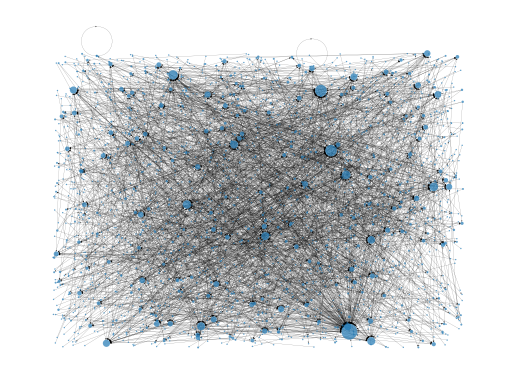

In [4]:
# Create random layout positions
pos = nx.random_layout(G_rt)

# Create size list
sizes = [x[1] for x in G_rt.degree()]

# Draw the network
nx.draw_networkx(G_rt, pos, 
    with_labels = False, 
    node_size = sizes,
    width = 0.1, alpha = 0.7,
    arrowsize = 2, linewidths = 0)

# Turn axis off and show
plt.axis('off'); plt.show()

In [5]:
# Generate in-degree centrality for retweets 
rt_centrality = nx.in_degree_centrality(G_rt)

# Generate in-degree centrality for replies 
reply_centrality = nx.in_degree_centrality(G_reply)
column_names = ['screen_name', 'degree_centrality']

# Store centralities in DataFrame
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

      screen_name  degree_centrality
84        FoxNews           0.055993
38     WhiteHouse           0.031059
1    ScottPresler           0.029746
7      TomiLahren           0.019685
175      HouseGOP           0.017060
         screen_name  degree_centrality
51   realDonaldTrump           0.057230
53             POTUS           0.019458
22           FoxNews           0.013735
6         WhiteHouse           0.011064
416           FLOTUS           0.010301


In [7]:
reply

,screen_name,degree_centrality
0,ProfessorRobo,0.0
1,BethMohn,0.0
2,ChristianMohn,0.0
3,ASilNY,0.0
4,LarrySchweikart,0.0
...,...,...
2617,indyhawkins,0.0
2618,Dookofurl,0.0
2619,LilPurpleKitty,0.0
2620,robjh1,0.0


In [8]:
# Generate betweenness centrality for retweets 
rt_centrality = nx.betweenness_centrality(G_rt)

# Generate betweenness centrality for replies 
reply_centrality = nx.betweenness_centrality(G_reply)

# Store centralities in data frames
rt = pd.DataFrame(list(rt_centrality.items()), columns = column_names)
reply = pd.DataFrame(list(reply_centrality.items()), columns = column_names)

# Print first five results in descending order of centrality
print(rt.sort_values('degree_centrality', ascending = False).head())

# Print first five results in descending order of centrality
print(reply.sort_values('degree_centrality', ascending = False).head())

        screen_name  degree_centrality
84          FoxNews           0.000026
29   Public_Citizen           0.000009
206     ChristiChat           0.000005
119      guypbenson           0.000005
362    johncardillo           0.000004
          screen_name  degree_centrality
288      ScottPresler       1.019365e-06
319   HRCNJVolunteers       2.912471e-07
1109             RRN3       2.912471e-07
1697    thebestcloser       2.912471e-07
1844   BrandonTXNeely       1.456236e-07
